0
1
2
0
1
2
0
1
2


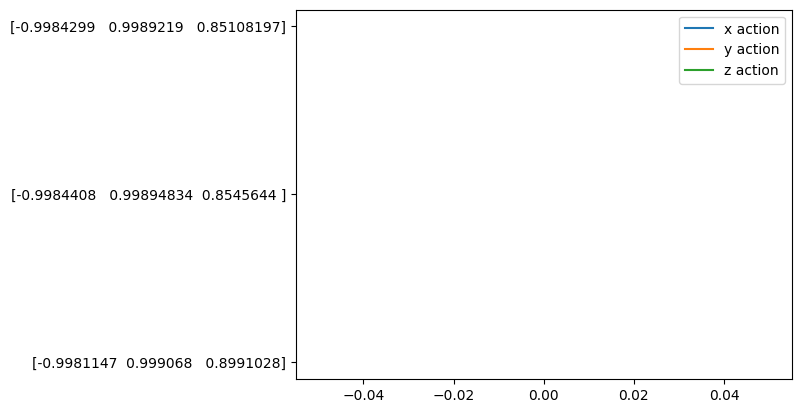

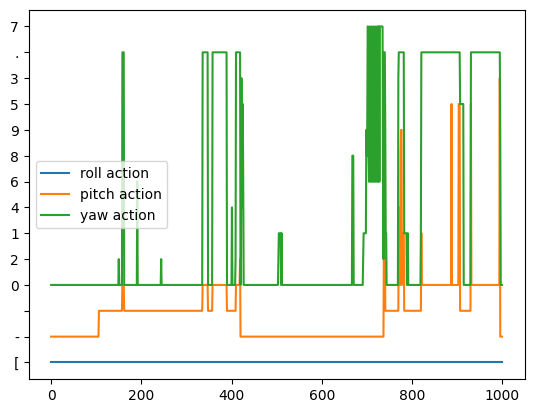

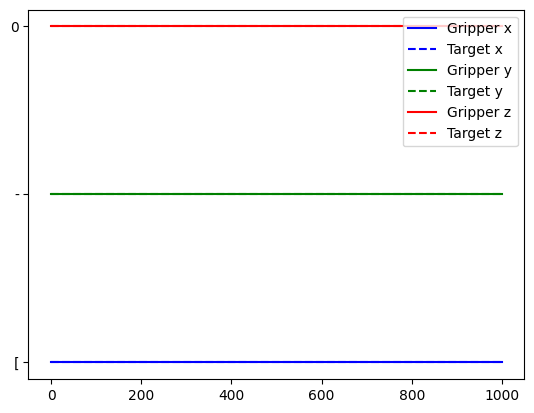

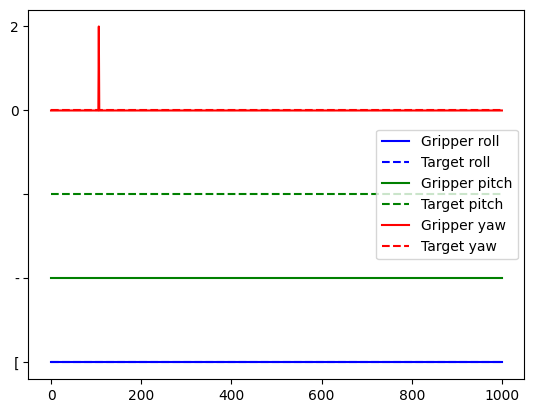

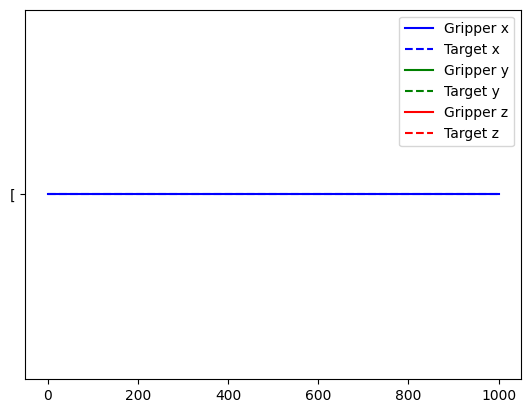

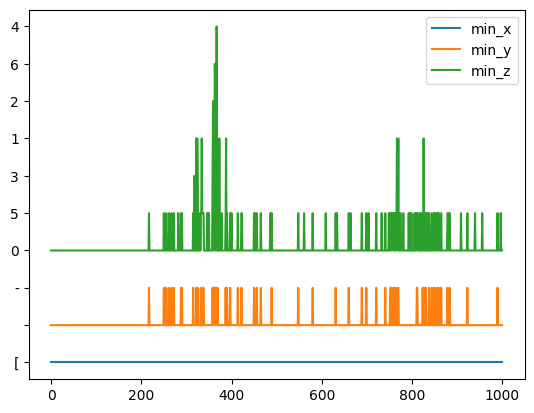

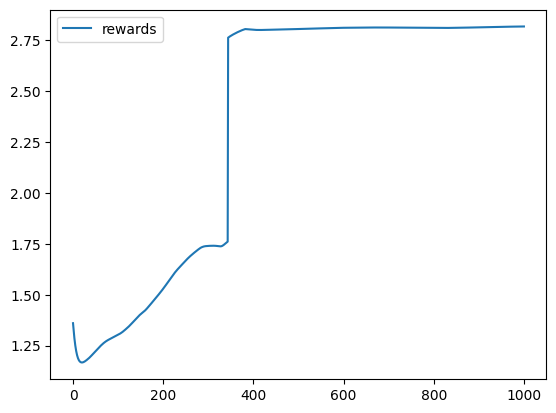

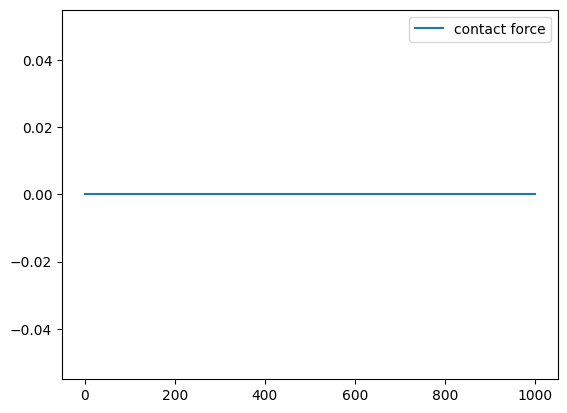

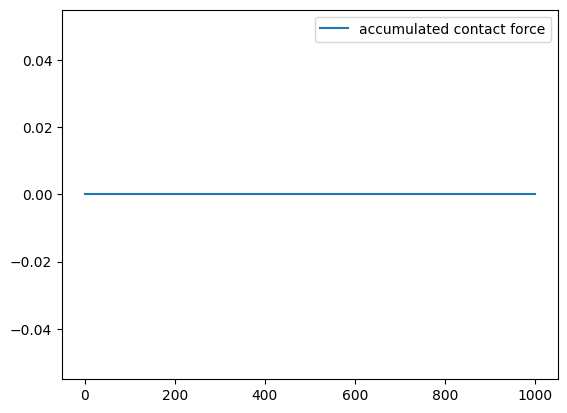

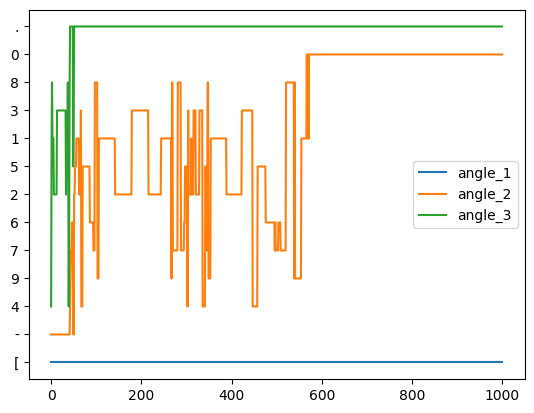

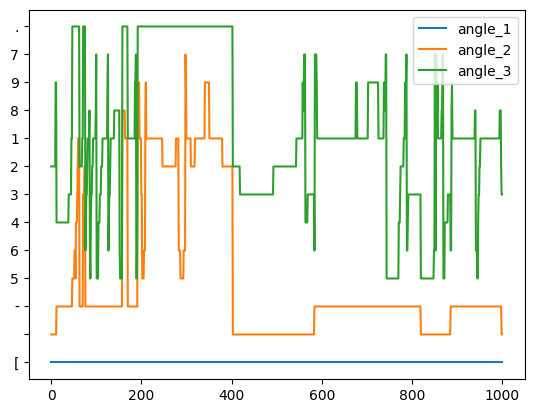

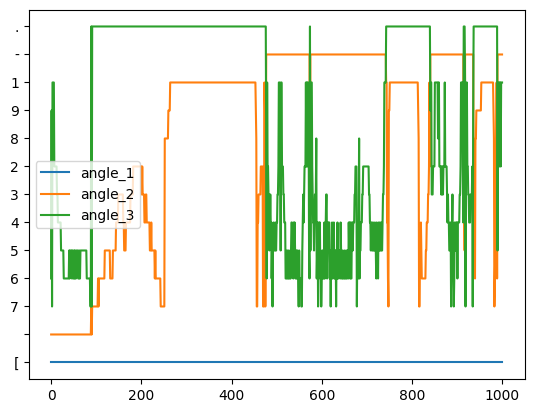

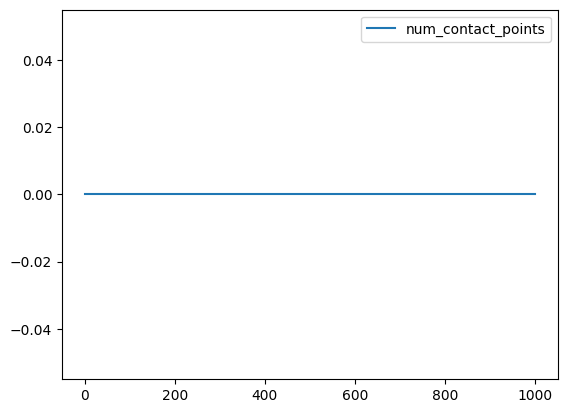

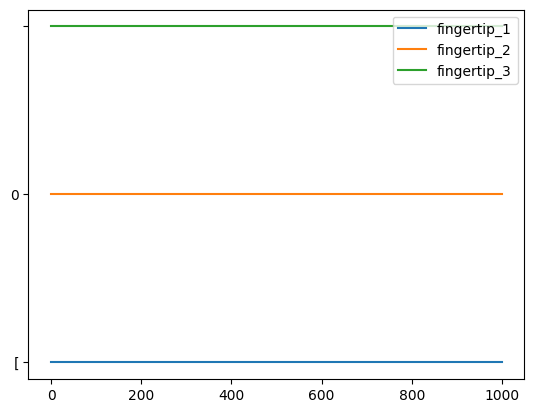

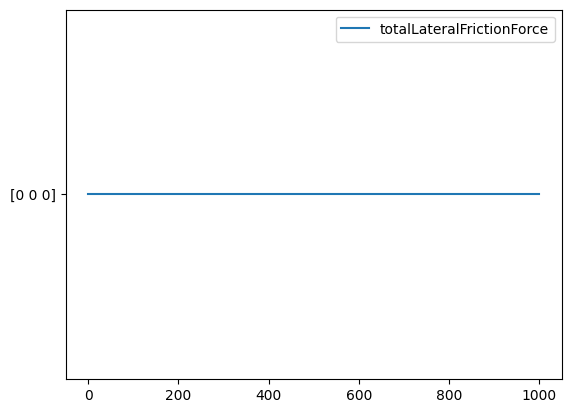

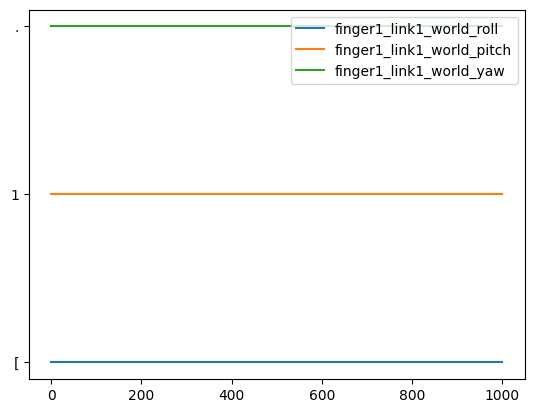

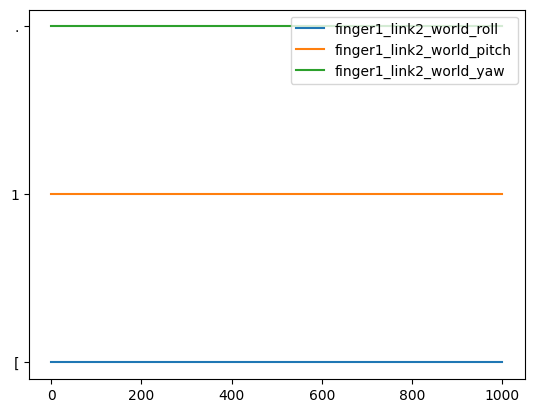

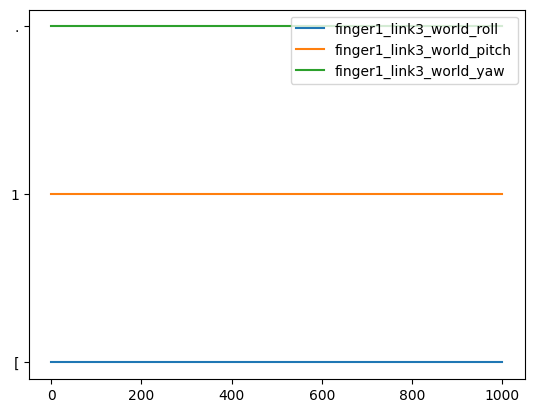

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

def plot_data(data, labels):
    """
    Plot the data using matplotlib.
    """
    plt.figure()
    for d, label in zip(data, labels):
        plt.plot(d, label=label)
        plt.legend()

def plot_combined_data(data_gripper, data_target, labels, upper_bound=None, lower_bound=None):
    """
    Plot gripper and target data on the same plot with the same color for each direction.
    Gripper data will be solid lines, target data will be dashed lines.
    """
    plt.figure()  # You can adjust the size if you want

    colors = ['b', 'g', 'r']  # blue, green, red for x, y, z respectively
    line_styles = ['-', '--']  # solid for gripper, dashed for target

    for i, (d_gripper, d_target, label) in enumerate(zip(data_gripper, data_target, labels)):
        print(i)
        color = colors[i % len(colors)]
        plt.plot(d_gripper, line_styles[0], color=color, label=f'Gripper {label}')
        plt.plot(d_target, line_styles[1], color=color, label=f'Target {label}')
        if upper_bound is not None and lower_bound is not None:
            plt.ylim(lower_bound, upper_bound)
        plt.legend()

def is_array_column(col):
    return isinstance(col.iloc[0], str) and col.iloc[0].startswith('[') and col.iloc[0].endswith(']') 

# Function to convert string representation of arrays to actual arrays
def convert_to_array(col):
    return col.apply(lambda x: [float(num) for num in x.strip('[]').split()])

file_path = 'output_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Iterate over the columns and apply the conversion function to each element
tuple_columns = ['position_action','angle_action','gripper_position','gripper_angle','gripper_velocity','gripper_angular_velocity','target_position','target_angle','target_velocity',
                 'target_angular_velocity','closest_point','contact_force','rewards','finger1_angles','finger2_angles','finger3_angles','finger1_min_dists','finger2_min_dists','finger3_min_dists',
                 'num_contact_points','fingertip_num_contact_points','accumulated_contact_force','totalLateralFrictionForce','finger1_link1_world_angles','finger1_link2_world_angles','finger1_link3_world_angles'
]
plot_data(zip(data["position_action"]), ["x action", "y action", "z action"])
plot_data(zip(*data["angle_action"]), ["roll action", "pitch action", "yaw action"])
plot_combined_data(zip(*data["gripper_position"]),zip(*data["target_position"]),["x", "y", "z"])
plot_combined_data(zip(*data["gripper_angle"]),zip(*data["target_angle"]),["roll", "pitch", "yaw"])
plot_combined_data(zip(*data["gripper_velocity"]),zip(*data["target_velocity"]),["x", "y", "z"], upper_bound=0.5, lower_bound=-0.5)
plot_data(zip(*data["closest_point"]), ["min_x", "min_y", "min_z"]) 
plot_data([data["rewards"]], ["rewards"])
plot_data([data["contact_force"]], ["contact force"])
plot_data([data["accumulated_contact_force"]], ["accumulated contact force"])
plot_data(zip(*data["finger1_angles"]), ["angle_1", "angle_2", "angle_3"])
plot_data(zip(*data["finger2_angles"]), ["angle_1", "angle_2", "angle_3"])
plot_data(zip(*data["finger3_angles"]), ["angle_1", "angle_2", "angle_3"])
plot_data([data["num_contact_points"]], ["num_contact_points"])
plot_data(zip(*data["fingertip_num_contact_points"]), ["fingertip_1", "fingertip_2", "fingertip_3"])
plot_data([data["totalLateralFrictionForce"]], ["totalLateralFrictionForce"])
plot_data(zip(*data["finger1_link1_world_angles"]), ["finger1_link1_world_roll", "finger1_link1_world_pitch", "finger1_link1_world_yaw"])
plot_data(zip(*data["finger1_link2_world_angles"]), ["finger1_link2_world_roll", "finger1_link2_world_pitch", "finger1_link2_world_yaw"])
plot_data(zip(*data["finger1_link3_world_angles"]), ["finger1_link3_world_roll", "finger1_link3_world_pitch", "finger1_link3_world_yaw"])

# Position Action Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["position_action_x"], color='r')
# plt.plot(db["position_action_y"], color='g')
# plt.plot(db["position_action_z"], color='b')
# plt.title('Position Action')
# plt.ylabel('Position (unit)')
# plt.xlabel('timestep')
# plt.legend(['x', 'y', 'z'])
# plt.show()

# # Angle Action Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["angle_action_x"], color='r')
# plt.plot(db["angle_action_y"], color='g')
# plt.plot(db["angle_action_z"], color='b')
# plt.title('Angle Action')
# plt.ylabel('Angle (radians)')
# plt.xlabel('timestep')
# plt.legend(['roll', 'pitch', 'yaw'])
# plt.show()

# # Gripper vs Target Position Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["gripper_position_x"], color='r')
# plt.plot(db["gripper_position_y"], color='g')
# plt.plot(db["gripper_position_z"], color='b')
# plt.plot(db["target_position_x"], linestyle='--', color='r')
# plt.plot(db["target_position_y"], linestyle='--', color='g')
# plt.plot(db["target_position_z"], linestyle='--', color='b')
# plt.title('Gripper vs Target Position')
# plt.ylabel('Position (unit)')
# plt.xlabel('timestep')
# plt.legend(['Gripper x', 'Gripper y', 'Gripper z', 'Target x', 'Target y', 'Target z'])
# plt.show()

# # Gripper vs Target Angle Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["gripper_angle_x"], color='r')
# plt.plot(db["gripper_angle_y"], color='g')
# plt.plot(db["gripper_angle_z"], color='b')
# plt.plot(db["target_angle_x"], linestyle='--', color='r')
# plt.plot(db["target_angle_y"], linestyle='--', color='g')
# plt.plot(db["target_angle_z"], linestyle='--', color='b')
# plt.title('Gripper vs Target Angle')
# plt.ylabel('Angle (radians)')
# plt.xlabel('timestep')
# plt.legend(['Gripper roll', 'Gripper pitch', 'Gripper yaw', 'Target roll', 'Target pitch', 'Target yaw'])
# plt.show()

# # Gripper vs Target Velocity Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["gripper_velocity_x"], color='r')
# plt.plot(db["gripper_velocity_y"], color='g')
# plt.plot(db["gripper_velocity_z"], color='b')
# plt.plot(db["target_velocity_x"], linestyle='--', color='r')
# plt.plot(db["target_velocity_y"], linestyle='--', color='g')
# plt.plot(db["target_velocity_z"], linestyle='--', color='b')
# plt.title('Gripper vs Target Velocity')
# plt.ylabel('Velocity (unit/s)')
# plt.xlabel('timestep')
# plt.legend(['Gripper vx', 'Gripper vy', 'Gripper vz', 'Target vx', 'Target vy', 'Target vz'])
# plt.show()

# # Closest Point Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["closest_point"])
# plt.title('Closest Distance')
# plt.ylabel('Distance (unit)')
# plt.xlabel('timestep')
# plt.show()

# # Contact Force Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["contact_force"])
# plt.title('Contact Force')
# plt.ylabel('Force (N)')
# plt.xlabel('timestep')
# plt.show()

# # Rewards Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["rewards"])
# plt.title('Rewards')
# plt.ylabel('Reward Value')
# plt.xlabel('timestep')
# plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to check if a column contains array-like data
def is_array_column(col):
    return isinstance(col.iloc[0], str) and col.iloc[0].startswith('[') and col.iloc[0].endswith(']')

# Function to convert string representation of arrays to actual arrays
def convert_to_array(col):
    return col.apply(lambda x: [float(num) for num in x.strip('[]').split()])

# Load the data from the CSV file
file_path = 'output_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plotting each column with array-like data
for col_name in data.columns:
    if is_array_column(data[col_name]):
        # Convert the string representation to arrays
        array_data = convert_to_array(data[col_name])
        
        # Create a separate plot for each direction (x, y, z)
        plt.figure(figsize=(10, 6))
        for i, direction in enumerate(['x', 'y', 'z']):
            plt.plot(array_data.apply(lambda x: x[i]), label=f'{direction}')

        plt.title(f'{col_name}')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.legend()
        plt.show()